In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import PredictionError

In [3]:
%load_ext pycodestyle_magic

In [4]:
%flake8_on

In [5]:
df = pd.read_csv("Advertising.csv")

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

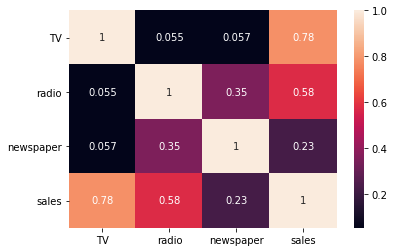

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
X = df.drop(["sales"], axis=1)

In [12]:
y = df.sales

In [13]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

6:80: E501 line too long (95 > 79 characters)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1:80: E501 line too long (89 > 79 characters)


In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
lm.intercept_

2.979067338122629

In [23]:
lm.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [24]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

In [25]:
coeff_parameter

,Coefficient
TV,0.044730
radio,0.189195
newspaper,0.002761


In [26]:
y_pred = lm.predict(X_test)

In [27]:
eval_metrics(y_test, y_pred)

r2_score: 0.899438024100912 
 mae: 1.4607567168117601 
 mse: 3.174097353976104 
 rmse: 1.7815996615334502


#### Our model seems to be 90% effective. Take a look at adjusted r2_score later on. It has a +/-1.46 margin of error.

In [33]:
my_dict = {"Actual": y_test, "Predicted": y_pred, "Difference": y_test-y_pred}
compare = pd.DataFrame(my_dict)

In [34]:
compare.sample(10)

,Actual,Predicted,Difference
76,6.9,4.568996,2.331004
68,18.9,18.831091,0.068909
164,11.9,11.017444,0.882556
148,10.9,12.336207,-1.436207
135,11.6,14.055140,-2.455140
60,8.1,5.809574,2.290426
165,11.9,14.345545,-2.445545
78,5.3,8.903493,-3.603493
56,5.5,8.736284,-3.236284
65,9.3,7.827403,1.472597


In [35]:
compare.Difference.mean()

-0.09752119905510022

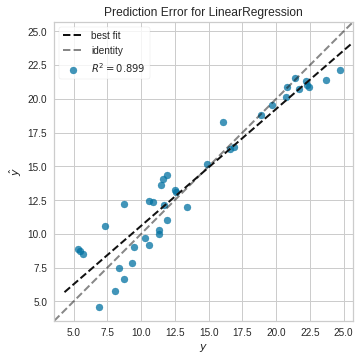

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [38]:
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()